## Code of an agent taking random actions in the environment. Used as a baseline

In [8]:
import gym
import numpy as np

# Initialize the environment
env_id = 'SpaceInvadersNoFrameskip-v4'
env = gym.make(env_id)

# Number of episodes
timesteps = 1000000
rewards = []; lengths = []
i_timesteps = 0

while i_timesteps < timesteps:
    # Reset the environment for each episode
    observation = env.reset()
    
    rewards.append(0); lengths.append(0); 
    
    while True:
        
        # Take a random action
        action = env.action_space.sample()
        
        # Get the observation, reward, done, and info after taking the action
        observation, reward, done, info = env.step(action)
        
        # Accumulate the obtained rewards
        rewards[-1] += reward
        lengths[-1] += 1
        i_timesteps += 1

        # If the episode is done, print its number and break the loop
        if done:
            print("{:.2f}%".format(i_timesteps/timesteps * 100))
            break
    

# Close the environment
env.close()

np.save("./logs/random/rewards.npy", rewards)
np.save("./logs/random/lengths.npy", lengths)


0.25%
0.45%
0.84%
1.09%
1.29%
1.40%
1.52%
1.74%
2.16%
2.37%
2.55%
2.74%
2.86%
3.05%
3.28%
3.46%
3.61%
3.86%
4.26%
4.46%
4.69%
5.00%
5.23%
5.56%
5.78%
6.01%
6.21%
6.44%
6.71%
6.94%
7.13%
7.38%
7.54%
8.01%
8.17%
8.50%
8.70%
8.91%
9.28%
9.66%
9.84%
10.05%
10.27%
10.38%
10.64%
10.88%
11.05%
11.28%
11.42%
11.58%
11.81%
12.04%
12.22%
12.38%
12.57%
12.85%
13.06%
13.25%
13.45%
13.57%
13.84%
14.14%
14.40%
14.57%
14.76%
15.00%
15.24%
15.57%
15.84%
16.07%
16.27%
16.47%
16.66%
16.81%
17.04%
17.27%
17.50%
17.68%
17.96%
18.17%
18.34%
18.46%
18.62%
18.81%
18.93%
19.14%
19.26%
19.42%
19.63%
19.89%
20.11%
20.26%
20.48%
20.60%
20.82%
21.01%
21.48%
21.70%
21.88%
22.11%
22.33%
22.45%
22.70%
23.14%
23.36%
23.53%
23.79%
24.06%
24.25%
24.49%
24.65%
24.78%
25.18%
25.41%
25.56%
25.68%
25.86%
26.15%
26.38%
26.61%
26.84%
26.95%
27.26%
27.40%
27.62%
27.84%
28.07%
28.28%
28.51%
28.67%
28.79%
29.01%
29.18%
29.34%
29.52%
29.72%
29.84%
30.01%
30.25%
30.50%
30.68%
30.82%
31.14%
31.36%
31.55%
31.73%
31.89%
32.01%
32.25

Average/std: 163.14, 107.39


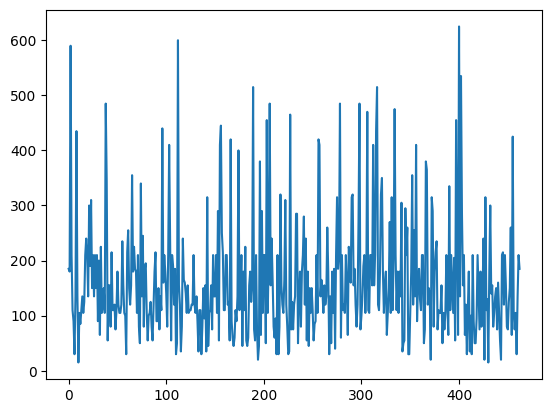

In [9]:
import matplotlib.pyplot as plt

rewards = np.load("./logs/random/rewards.npy")
plt.plot(rewards)

print("Average/std: {:.2f}, {:.2f}".format(np.average(rewards), np.std(rewards)))

In [1]:
# compare its performance with that of the trained policy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lengths = []; rewards = []
time = np.array(pd.read_csv("./results/n0_eval_length.csv")["Step"])

for ii in range(3):
    lengths.append(np.array(pd.read_csv("./results/n{}_eval_length.csv".format(ii))["Value"]))
    rewards.append(np.array(pd.read_csv("./results/n{}_eval_reward.csv".format(ii))["Value"]))
    
mean_random_length = np.ones(shape=(len(time),1)) * np.mean(np.load("./logs/random/lengths.npy"))
std_random_length = np.ones(shape=(len(time),1)) * np.std(np.load("./logs/random/lengths.npy"))

mean_random_reward = np.ones(shape=(len(time),1)) * np.mean(np.load("./logs/random/rewards.npy"))
std_random_reward = np.ones(shape=(len(time),1)) * np.std(np.load("./logs/random/rewards.npy"))
    
plt.figure()
mean = np.mean(lengths, axis=0)
std = np.std(lengths, axis=0)

plt.plot(time, mean, color='red')  # plot the mean in blue
plt.fill_between(time, mean - std, mean + std, color='red', alpha=0.2)  # plot the standard deviation in light blue

plt.plot(time, mean_random_length, color='black')  # plot the mean in blue
plt.fill_between(time, (mean_random_length - std_random_length)[:,0], (mean_random_length + std_random_length)[:,0], color='black', alpha=0.2)  # plot the standard deviation in light blue

plt.xlabel('# episode')
plt.ylabel('Average length of 10 evaluation episodes')
plt.grid()
plt.savefig('./results/submission/avg_length.png')
plt.savefig('./results/submission/avg_length.eps')
plt.show()

plt.figure()
mean = np.mean(rewards, axis=0)
std = np.std(rewards, axis=0)

plt.plot(time, mean, color='blue')  # plot the mean in blue
plt.fill_between(time, mean - std, mean + std, color='blue', alpha=0.2)  # plot the standard deviation in light blue

plt.plot(time, mean_random_reward, color='black')  # plot the mean in blue
plt.fill_between(time, (mean_random_reward - std_random_reward)[:,0], (mean_random_reward + std_random_reward)[:,0], color='black', alpha=0.2)  # plot the standard deviation in light blue


mean = np.mean(rewards, axis=0)
std = np.std(rewards, axis=0)

plt.plot(time, mean, color='blue')  # plot the mean in blue
plt.fill_between(time, mean - std, mean + std, color='blue', alpha=0.2)  # plot the standard deviation in light blue

plt.xlabel('# episode')
plt.ylabel('Average reward of 10 evaluation episodes')
plt.grid()
plt.savefig('./results/submission/avg_reward.png')
plt.savefig('./results/submission/avg_reward.eps')
plt.show()